In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import pandas as pd
import warnings;
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
## Plotting settings
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
import seaborn as sns
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

TITLE_SIZE = 45
LABEL_SIZE = 40
LEGEND_TITLE_SIZE = 35
LEGEND_SIZE = 30
TICK_SIZE = 30

FONT = 'serif'
params = {}
params['legend.title_fontsize'] = LEGEND_TITLE_SIZE
params['axes.labelsize'] = LABEL_SIZE
params['axes.titlesize'] = TITLE_SIZE
params['legend.fontsize'] = LEGEND_SIZE
params['xtick.labelsize']= TICK_SIZE
params['ytick.labelsize'] = TICK_SIZE
params["font.family"] = "Times New Roman"
context = sns.plotting_context("paper", rc=params)
sns.set_theme(style="whitegrid", font=FONT)

# Loading correlations data

In [17]:
corr_table = pd.read_csv(os.path.join('results', 'correlations_table.csv'))

In [18]:
corr_table

,dataset,model,beta,k,actions,data_pop_corr,base_pop_corr,max_pop_corr,base_exp_corr,max_exp_corr
0,ml-1m,libfm,0.1,20,next_k,0.346280,0.812007,-0.571081,0.173658,0.376370
1,ml-1m,libfm,1.0,5,next_k,0.346280,0.840214,0.500142,0.366020,0.527470
2,ml-1m,libfm,1.0,20,next_k,0.346280,0.826167,-0.007062,0.344304,0.488567
3,ml-1m,libfm,0.1,10,next_k,0.346280,0.821801,-0.487673,0.179375,0.515071
4,ml-1m,libfm,1.0,10,next_k,0.346280,0.833602,0.273379,0.405494,0.520103
...,...,...,...,...,...,...,...,...,...,...
92,ml-1m,knn,4.0,10,random_future,0.346280,0.917528,0.657859,0.022743,-0.402136
93,ml-1m,knn,1.0,5,random_future,0.346280,0.977994,0.919851,0.198107,-0.331402
94,ml-1m,knn,10.0,20,random_future,0.346280,0.880733,0.541045,-0.004664,-0.445044
95,mind,libfm,2.0,10,next_k,0.863992,0.825251,0.435212,0.050961,0.112558


## Availability and Discovery Correlation Tables

In [19]:
dataset_table = corr_table[corr_table['k']==10]
dataset_table = dataset_table[dataset_table['actions']=='next_k']

In [20]:
print(dataset_table[['dataset','model','data_pop_corr','base_pop_corr','max_pop_corr']])

   dataset  model  data_pop_corr  base_pop_corr  max_pop_corr
3    ml-1m  libfm       0.346280       0.821801     -0.487673
4    ml-1m  libfm       0.346280       0.833602      0.273379
5    ml-1m  libfm       0.346280       0.834437     -0.105101
6    ml-1m  libfm       0.346280       0.827492      0.501316
12   ml-1m  libfm       0.346280       0.814034      0.572407
13   ml-1m  libfm       0.346280       0.792790      0.601166
56   ml-1m    knn       0.346280       0.968103      0.966459
57   ml-1m    knn       0.346280       0.971501      0.971697
58   ml-1m    knn       0.346280       0.949581      0.942986
63   ml-1m    knn       0.346280       0.902038      0.892086
64   ml-1m    knn       0.346280       0.860072      0.845516
95    mind  libfm       0.863992       0.825251      0.435212
96  lastfm  libfm       0.133318       0.671101      0.145949


In [21]:
print(dataset_table[['dataset','model','base_exp_corr','max_exp_corr']])

   dataset  model  base_exp_corr  max_exp_corr
3    ml-1m  libfm       0.179375      0.515071
4    ml-1m  libfm       0.405494      0.520103
5    ml-1m  libfm       0.321980      0.507558
6    ml-1m  libfm       0.475777      0.530359
12   ml-1m  libfm       0.498038      0.512818
13   ml-1m  libfm       0.378427      0.489853
56   ml-1m    knn       0.288045     -0.088048
57   ml-1m    knn       0.305290     -0.171238
58   ml-1m    knn       0.206556     -0.031929
63   ml-1m    knn      -0.002063     -0.062081
64   ml-1m    knn      -0.012962     -0.221725
95    mind  libfm       0.050961      0.112558
96  lastfm  libfm      -0.084130     -0.089226


## Availability Correlation Bar Plot over Actions

In [22]:
corr_table_barplot = corr_table.rename(columns={'actions':'Action space', 'max_pop_corr':'Max Avail. Correlation', 'k':'K'})

corr_table_barplot['Action space'] = corr_table_barplot['Action space'].replace({'next_k':'Next K', 'random_history':'Random history',
                                                                'random_future':'Random future'})

corr_table_barplot = corr_table_barplot[corr_table_barplot['dataset']=='ml-1m']

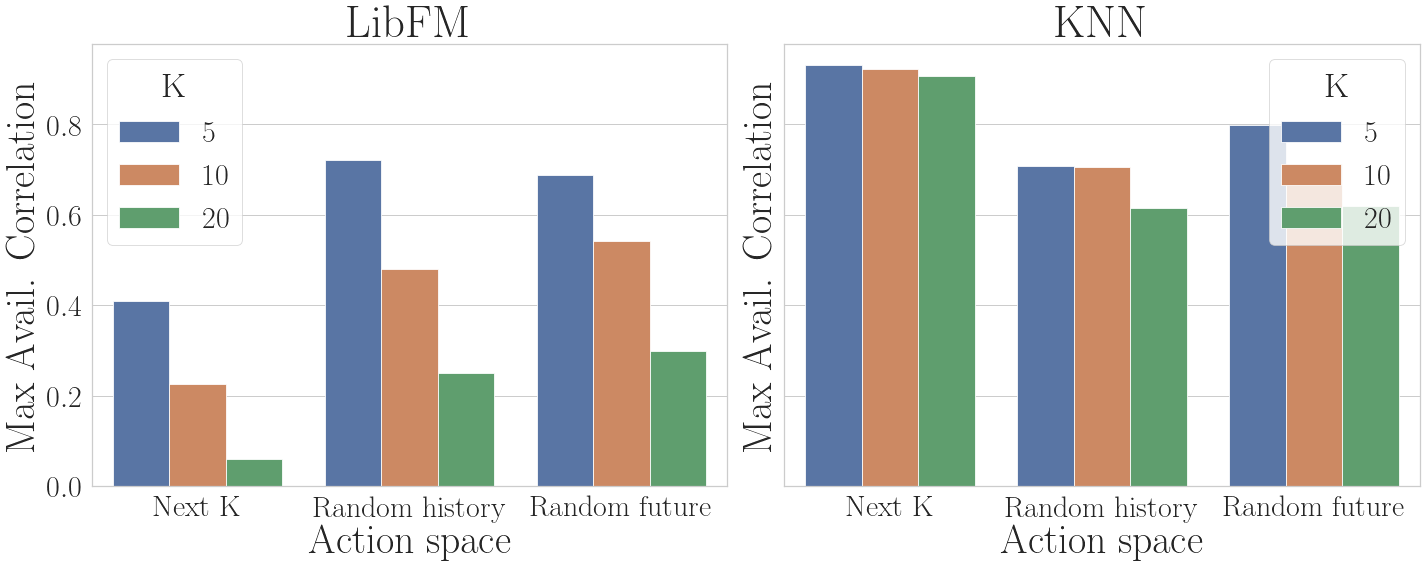

In [24]:
fig, axs = plt.subplots(1,2, figsize=(20,8), sharey=True)
with context:
    sns.barplot(x="Action space", y="Max Avail. Correlation", hue="K",
                data = corr_table_barplot[corr_table_barplot['model']=='libfm'],
               ax=axs[0], ci=None)
    axs[0].set_title('LibFM')
    sns.barplot(x="Action space", y="Max Avail. Correlation", hue="K", 
                data = corr_table_barplot[corr_table_barplot['model']=='knn'],
               ax=axs[1], ci=None)
    axs[1].set_title('KNN')
    for ax in axs:
        ax.xaxis.label.set_size(LABEL_SIZE)
        ax.yaxis.label.set_size(LABEL_SIZE)
        for t in ax.get_xticklabels():   
            t.set_fontsize(TICK_SIZE)
        for t in ax.get_yticklabels():  
            t.set_fontsize(TICK_SIZE)
    plt.tight_layout()
    plt.show()

In [25]:
# fig.savefig('ml1m_corr_action.pdf', dpi = 100)

In [26]:
corr_table_barplot = corr_table.rename(columns={'actions':'Action space', 
                                                'max_exp_corr':'Max Disc. Correlation', 
                                                'base_exp_corr':'Base Disc. Correlation', 
                                                'k':'K'})

corr_table_barplot['Action space'] = corr_table_barplot['Action space'].replace({'next_k':'Next K', 'random_history':'Random history',
                                                                'random_future':'Random future'})

corr_table_barplot = corr_table_barplot[corr_table_barplot['dataset']=='ml-1m']

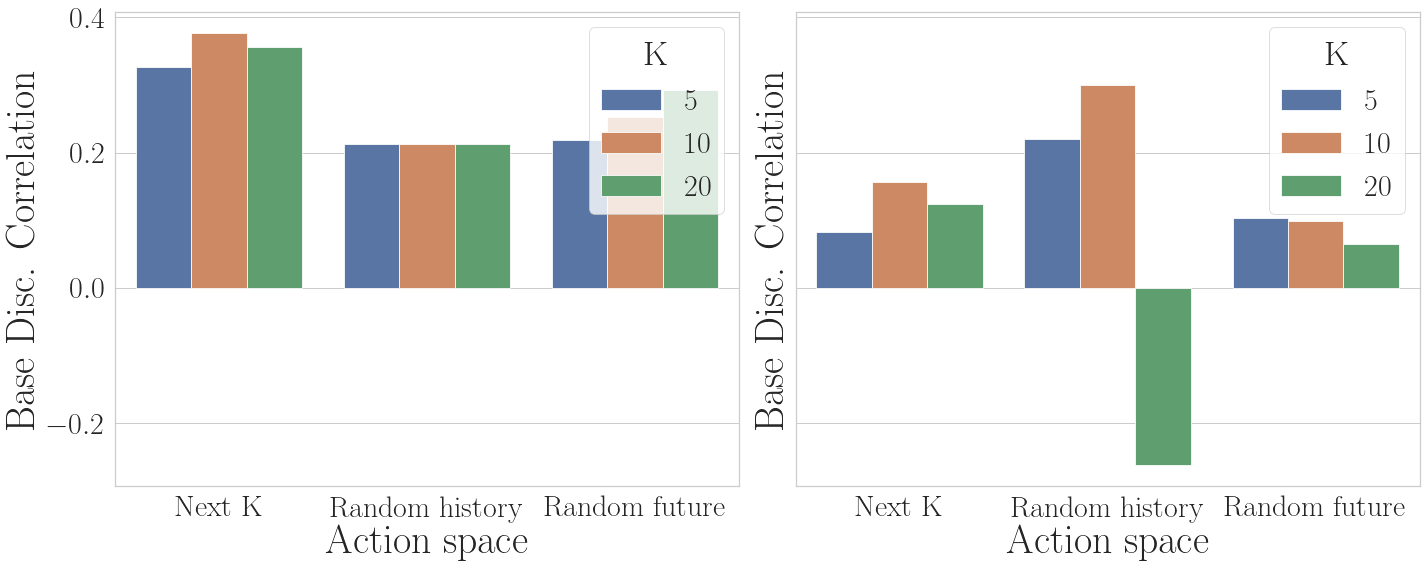

In [27]:
# plt.figure()
# ax = plt.subplot(1,2,1)
fig, axs = plt.subplots(1,2, figsize=(20,8), sharey=True)
with context:
    sns.barplot(x="Action space", y="Base Disc. Correlation", hue="K",
                data = corr_table_barplot[corr_table_barplot['model']=='libfm'],
               ax=axs[0], ci=None)
    sns.barplot(x="Action space", y="Base Disc. Correlation", hue="K", 
                data = corr_table_barplot[corr_table_barplot['model']=='knn'],
               ax=axs[1], ci=None)
    for ax in axs:
        ax.xaxis.label.set_size(LABEL_SIZE)
        ax.yaxis.label.set_size(LABEL_SIZE)
        for t in ax.get_xticklabels():
            t.set_fontsize(TICK_SIZE)
        for t in ax.get_yticklabels():
            t.set_fontsize(TICK_SIZE)
    plt.tight_layout()
    plt.show()

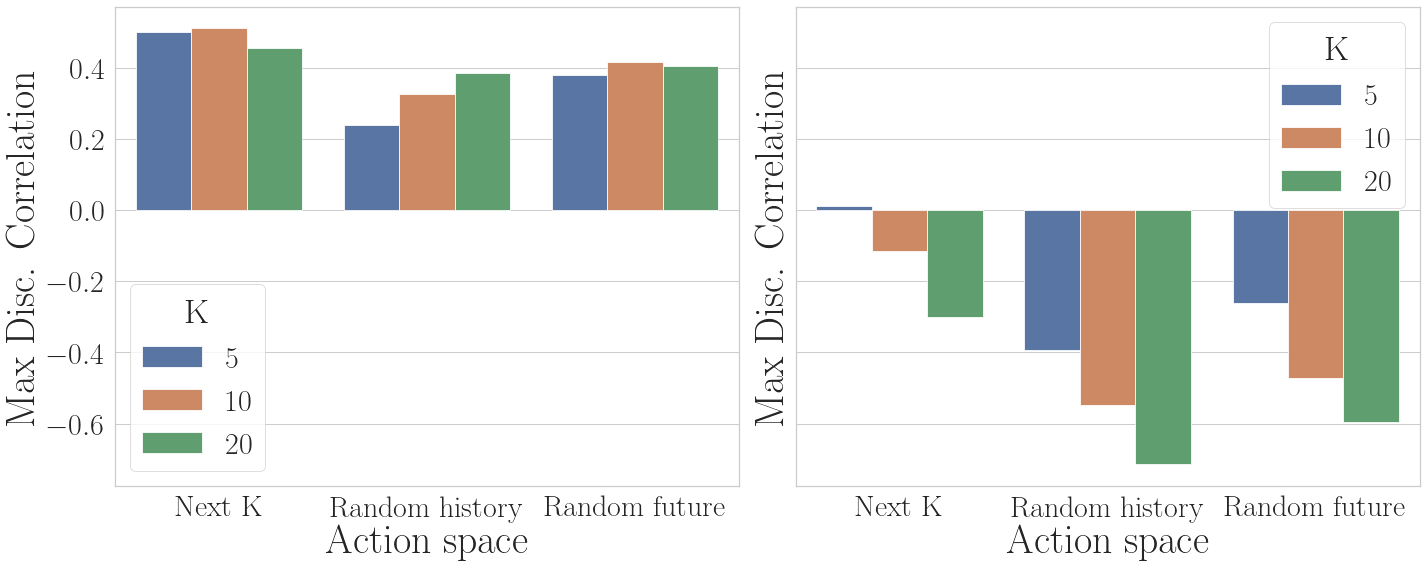

In [28]:
# plt.figure()
# ax = plt.subplot(1,2,1)
fig, axs = plt.subplots(1,2, figsize=(20,8), sharey=True)
with context:
    sns.barplot(x="Action space", y="Max Disc. Correlation", hue="K",
                data = corr_table_barplot[corr_table_barplot['model']=='libfm'],
               ax=axs[0], ci=None)
    sns.barplot(x="Action space", y="Max Disc. Correlation", hue="K", 
                data = corr_table_barplot[corr_table_barplot['model']=='knn'],
               ax=axs[1], ci=None)
    for ax in axs:
        ax.xaxis.label.set_size(LABEL_SIZE)
        ax.yaxis.label.set_size(LABEL_SIZE)
        for t in ax.get_xticklabels():
            t.set_fontsize(TICK_SIZE)
        for t in ax.get_yticklabels():
            t.set_fontsize(TICK_SIZE)
    plt.tight_layout()
    plt.show()